# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [12]:
# Save config information
url =  "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set up lists to hold response info
latitude = []
longitude = []
max_temp = []
humidity = []
cloud_coverage = []
wind_speed = []
country = []
datetime = []
city_list = []
# Set up counters
record = 0
sets = 1

# Create print statement to start data retrieval
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through each city
for city in cities:
    
    # Start the counter and print number and city name currently retrieving data for
    record = record + 1
    print(f"Processing Record {record} of Set {sets} | {city}")
    
    # Create if statement to move to the next set when record hits 50     
    if record == 50:
        record = 0
        sets = sets + 1        
    
    # Try to perform a request for data on each and store in empty list
    try:
        
        # Build query URL
        query_url = f"{url}appid={weather_api_key}&units={units}&q="
        
        # Make request and store response 
        response = requests.get(query_url + city).json()
        
        # Append data to list
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud_coverage.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        city_list.append(response['name'])
    
    # Handle exceptions for a city that is not available with print statement
    except:
        print(f"City not found. Skipping...")
            
# Print statement for completion
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | tiznit
Processing Record 7 of Set 1 | lavrentiya
Processing Record 8 of Set 1 | roma
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | bathsheba
Processing Record 12 of Set 1 | hwange
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 18 of Set 1 | north bend
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | clyde

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create a DataFrame
weather_dict = {
    "City": city_list,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud_coverage,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": datetime }
weather_data = pd.DataFrame(weather_dict)

# Export the city data into a .csv
weather_data.to_csv(output_data_file, index = False)

# Display the DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,80.04,80,95,13.22,MV,1667158411
1,Castro,-24.7911,-50.0119,72.46,82,100,9.06,BR,1667158412
2,Albany,42.6001,-73.9662,65.25,31,100,1.99,US,1667158401
3,Mataura,-46.1927,168.8643,54.97,65,28,1.14,NZ,1667158413
4,Rikitea,-23.1203,-134.9692,72.70,81,100,5.17,PF,1667158379


In [16]:
# Create a summary statistics table for weather data
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,20.101181,16.292065,60.413696,70.300000,58.519643,8.592679,1.667159e+09
std,33.138637,90.479601,21.906910,21.026502,40.380254,6.167413,1.179815e+02
min,-54.800000,-179.166700,-16.380000,11.000000,0.000000,0.000000,1.667158e+09
25%,-7.478950,-65.110050,51.280000,59.000000,18.000000,4.030000,1.667158e+09
50%,24.952100,20.087500,64.650000,74.500000,73.000000,6.980000,1.667159e+09
75%,47.751350,97.318900,77.740000,86.000000,100.000000,11.500000,1.667159e+09
max,78.218600,179.316700,99.630000,100.000000,100.000000,40.290000,1.667159e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

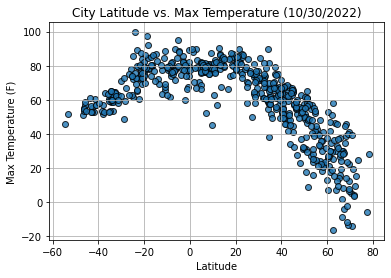

In [58]:
# Create a Scatter Plot for Latitude vs. Temperature
date = time.strftime("%m/%d/%Y")
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

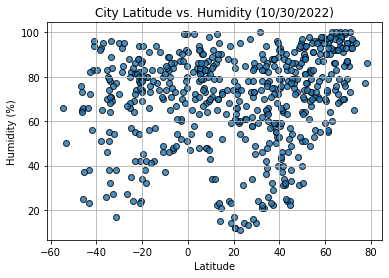

In [61]:
# Create a Scatter Plot for Latitude vs. Humidity
date = time.strftime("%m/%d/%Y")
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsHumidtyPlot.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

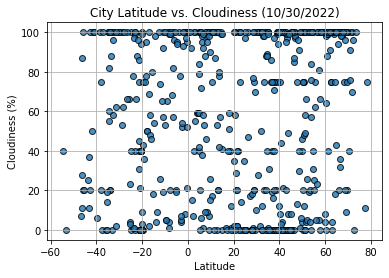

In [56]:
# Create a Scatter Plot for Latitude vs. Cloudiness
date = time.strftime("%m/%d/%Y")
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

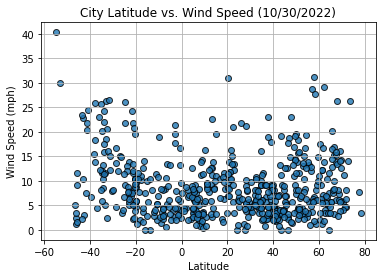

In [62]:
# Create a Scatter Plot for Latitude vs. Wind Speed
date = time.strftime("%m/%d/%Y")
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

## Linear Regression

In [63]:
# Create DataFrames for Northern and Southern Hemisphere
north = weather_data.loc[weather_data["Lat"] >= 0]
south = weather_data.loc[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7186852730028657


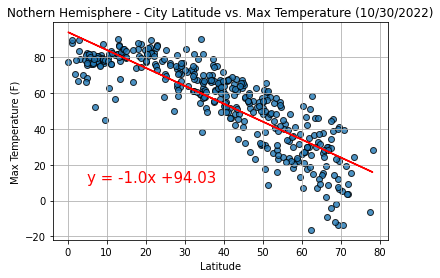

In [70]:
# Create a Scatter Plot for Latitude vs. Temperature for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['Max Temp']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(5,10),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Max Temperature ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5306014796694761


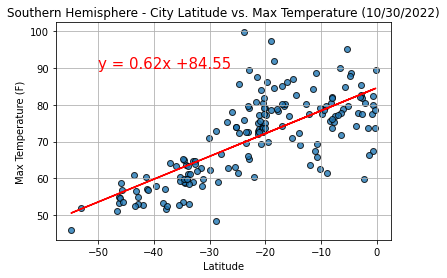

In [73]:
# Create a Scatter Plot for Latitude vs. Temperature for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['Max Temp']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-50,90),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere - City Latitude vs. Max Temperature ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06397876875428715


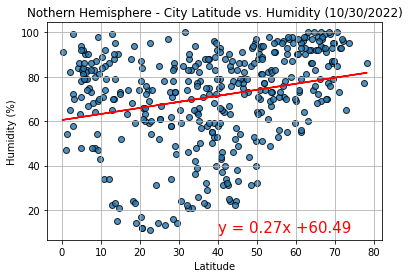

In [77]:
# Create a Scatter Plot for Latitude vs. Humidity for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['Humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(40,10),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Humidity ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsHumidityPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02529185725028045


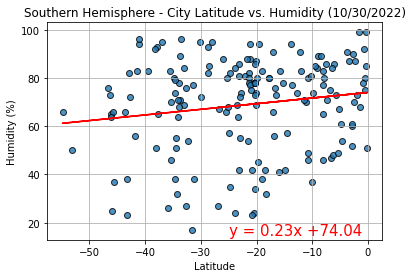

In [83]:
# Create a Scatter Plot for Latitude vs. Humidity for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['Humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-25,15),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Humidity ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsHumidityPlot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.014860380439241667


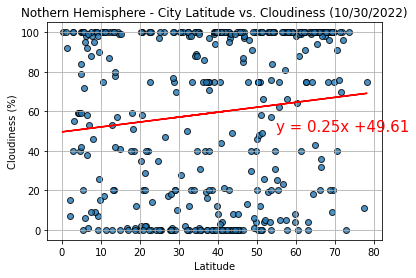

In [87]:
# Create a Scatter Plot for Latitude vs. Cloudiness for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['Cloudiness']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(55,50),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Cloudiness ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.010471271227392049


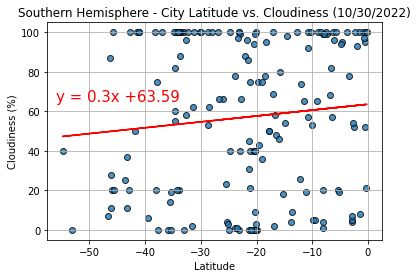

In [94]:
# Create a Scatter Plot for Latitude vs. Cloudiness for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['Cloudiness']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-56,65),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Cloudiness ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.024165430577886803


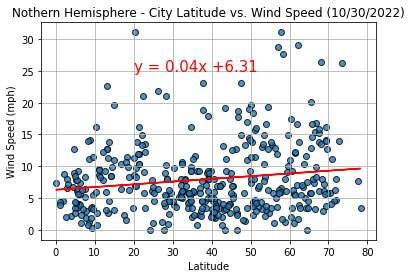

In [97]:
# Create a Scatter Plot for Latitude vs. Temperature for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['Wind Speed']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(20,25),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Nothern Hemisphere - City Latitude vs. Wind Speed ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15820445415285214


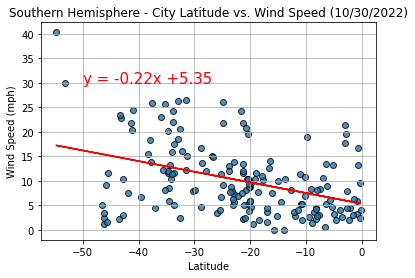

In [98]:
# Create a Scatter Plot for Latitude vs. Temperature for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['Wind Speed']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-50,30),fontsize = 15,color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere - City Latitude vs. Wind Speed ({date})')
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()